Hello, data science enthusiast. In this blog post, I will guide through Kaggle's submission on the Titanic dataset. We will do EDA on the titanic dataset using some commonly used tools and techniques in python. And then build some Machine Learning models to predict the target features. Want to revise what exactly EDA is? Here is my article on Introduction to EDA.

In one of my initial article Building Linear Regression Models, I explained how to model and predict different linear regression algorithm. In that case, the dataset I used had all features in numerical form. But most of the real-world data set holds lots of non-numerical features. We must transform those non-numerical features into numerical values. The same issue arises in this Titanic dataset that's why we will do a few data transformation here. Without any further discussion, let's begin with downloading data first. Here is the link to the Titanic dataset from Kaggle.

## Import all the relevant dependencies we need:

You might get some error latter on telling you some libraries you might not have. If so you must install it then. While i was doing this task inspired by Daniel Bourke , I had to install missingo and catboot initially on my jupyter notebook.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in g:\programs\anaconda3\lib\site-packages (from missingno) (3.1.3)



In [2]:
pip install catboost

In [1]:
#import dependencies
%matplotlib inline

#start python imports
import math, time, random, datetime

#data manupilation
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, label_binarize

#Machine Learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from catboost import CatBoostClassifier, Pool, cv

#ignore warnings for now
import warnings
warnings.filterwarnings('ignore')


## Loading in the data:

I have saved my downloaded data into file "data". While downloading, train and test data set are already separated. and there is one more csv file for example for what submission should look like. so let's load each file with the respective name.

In [2]:
# Import train and test data
train= pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
gender_submission=pd.read_csv('data/gender_submission.csv') # example of what a submission should look like


In [116]:
test=pd.read_csv('data/test.csv')

In [117]:
# view the tranning data
train.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

Let's view  number of passenger in different age group.

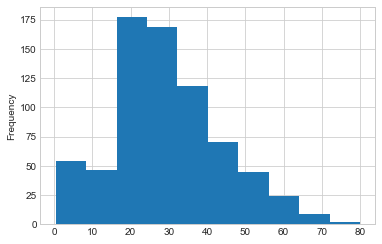

In [4]:
train.Age.plot.hist()

In [5]:
#view the test data same as train data 
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
#view the example submission dataframe
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

##    Data Descriptions:

You must have read the data discription while downliading the dataset from kaggale. if not here is what each fearture represents.

Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
#data discription
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Check missing values:

Before making any analysis lets check if we have any missing values.

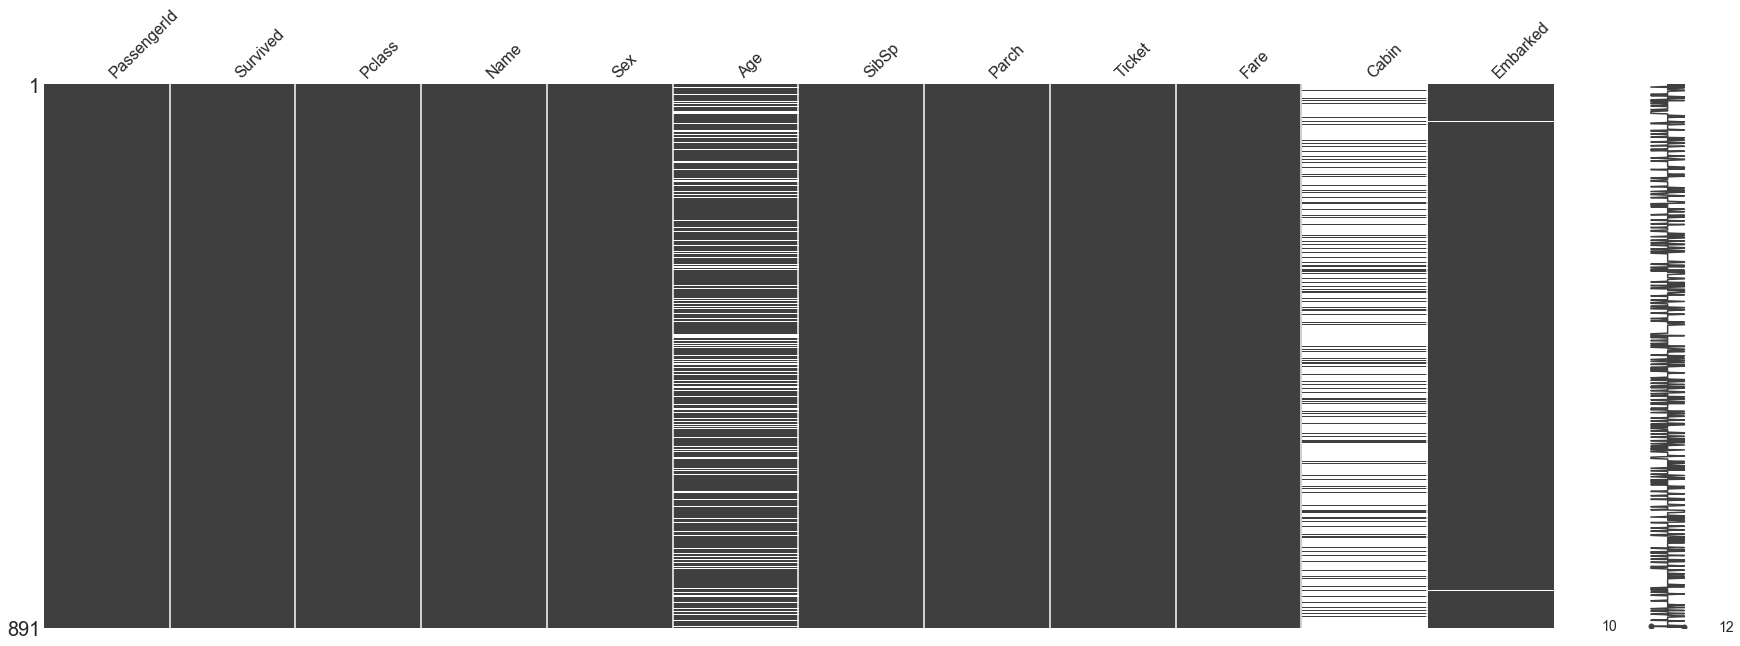

In [8]:
# plot graphic of missing values
missingno.matrix(train, figsize=(30,10))

You can clearly see some missing values here. Cabin column has the most missing values. And then Age columns also have quite a few missing values.
It's important to visualize missing values early so you know where the major holes are in your dataset. And then you can decide which data cleaning and preprocessing are better for filling those holes.

Here is an alternative way of finding missing values.

In [9]:
# alternatively you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

looks like we have few data missing in Embarked field and a lot in Age and Cabin field. We will figure out what would be the best data imputation technique for these features.

To perform our data analysis, let's create new data frames. We will add the column of features in this data frame as we make those columns applicable for modeling latter on.

In [10]:
df_new =pd.DataFrame() 

First let's see what arew the different data types of different columns in out train dataset.

In [11]:
# different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Generally features with a datatype of object could be considered categorical features and those which are floats or ints (numbers) could be considered numerical features. However, as we dig deeper, we might find features that are numerical may actually be categorical.

##  Explore each of these features individually:

We'll go through each column iteratively and see which ones are useful for ML modeling latter on. Some columns may need more preprocessing than others to get ready to use an algorithm.

In [12]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Target Feature: Survived

0    549
1    342
Name: Survived, dtype: int64


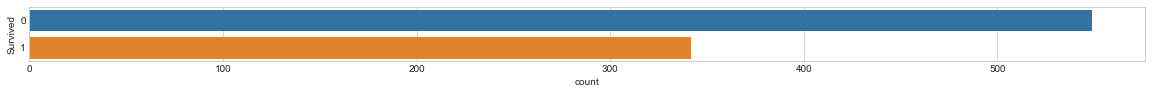

In [13]:
# how many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [14]:
# Let's add this to our subset dataframe
df_new['Survived'] = train['Survived']


In [15]:
df_new.head()

Survived
0         0
1         1
2         1
3         1
4         0

## Feature: Pclass

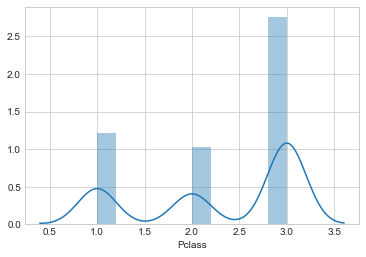

In [16]:
# Let's plot the distribution of Pclass
sns.distplot(train.Pclass)

Looks like there is either 1,2 or 3 Pclass for each existing value. This feature column looks numerical but actually, it is categorical. Each value in this feature is Pclass's type and non of them represent any numerical estimation. Here Pclass 3 has the highest frequency. Now let's see if this feature has any missing value.

In [17]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

This line of code above returns 0. Since there are no missing values let's add Pclass to new subset data frame.

In [18]:
#Since there are no missing values let's add Pclass to sub dataframe
df_new['Pclass']= train['Pclass']


## Feature: Name

In [19]:
# How many different names are there?
train.Name.value_counts()

Meo, Mr. Alfonzo                                   1
Rice, Master. Arthur                               1
Skoog, Master. Harald                              1
Andersen-Jensen, Miss. Carla Christine Nielsine    1
Rogers, Mr. William John                           1
                                                  ..
Petranec, Miss. Matilda                            1
Slemen, Mr. Richard James                          1
Doharr, Mr. Tannous                                1
Maioni, Miss. Roberta                              1
Toufik, Mr. Nakli                                  1
Name: Name, Length: 891, dtype: int64

Here length of train.Name.value_counts() is 891 which is same as number of rows. So each row seems to have a unique name. This makes it difficult to find any pattern in Name of a person with survival. Let's not include this feature Name in the new subset data frame.

## Feature: Sex

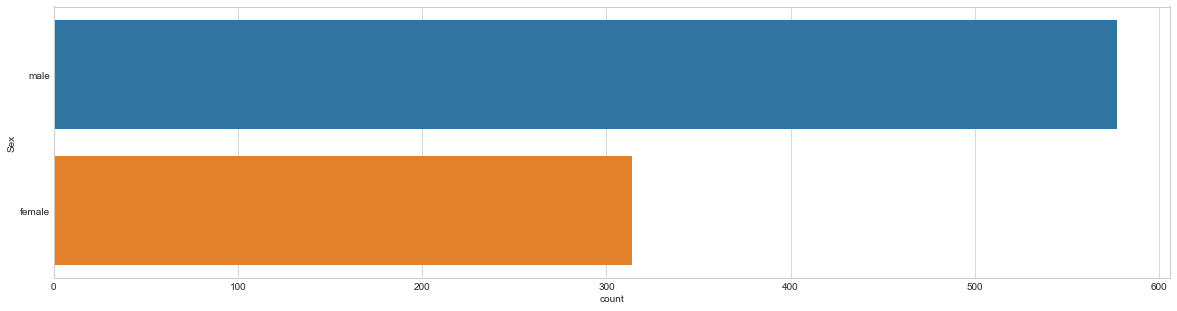

In [20]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [21]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

In [22]:
# add Sex to the subset dataframe
df_new['Sex'] = train['Sex']

In [23]:
df_new.head()

Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male

let's encode sex varibl with lable encoder to convert this categorical variable to numerical.

In [24]:
df_new['Sex']=LabelEncoder().fit_transform(df_new['Sex'])

In [25]:
df_new.head()

Survived  Pclass  Sex
0         0       3    1
1         1       1    0
2         1       3    0
3         1       1    0
4         0       3    1

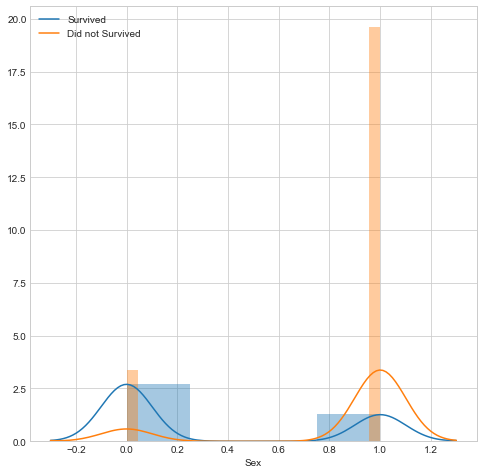

In [26]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(8,8))
sns.distplot(df_new.loc[df_new['Survived'] == 1]['Sex'], kde_kws={'bw': 0.1,"label": "Survived"});
sns.distplot(df_new.loc[df_new['Survived'] == 0]['Sex'], kde_kws={'bw': 0.1,"label": "Did not Survived"});


##        Feature: Age

In [27]:
# How many missing values does age have?
train.Age.isnull().sum()


177

What would you do with these missing values? 

Could replace them with the average age? 

What are the pros and cons of doing this?

Or would you get rid of them completely?
We won't answer these questions in our initial EDA but this is something we would revisit at a later date. For now, let's skip this feature.

In [28]:
def plot_count_dist(data, label_column, target_column, figsize=(20, 5)):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=data);
    plt.subplot(1, 2, 2)
    sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={'bw': 0.2,"label": "Survived"});
    sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={'bw': 0.2,"label": "Did not survive"});

## Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [29]:
# How many missing values does SibSp has?
train.SibSp.isnull().sum()

0

In [30]:
#What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
#Add SibSp to new dataframe
df_new['SibSp'] = train['SibSp']

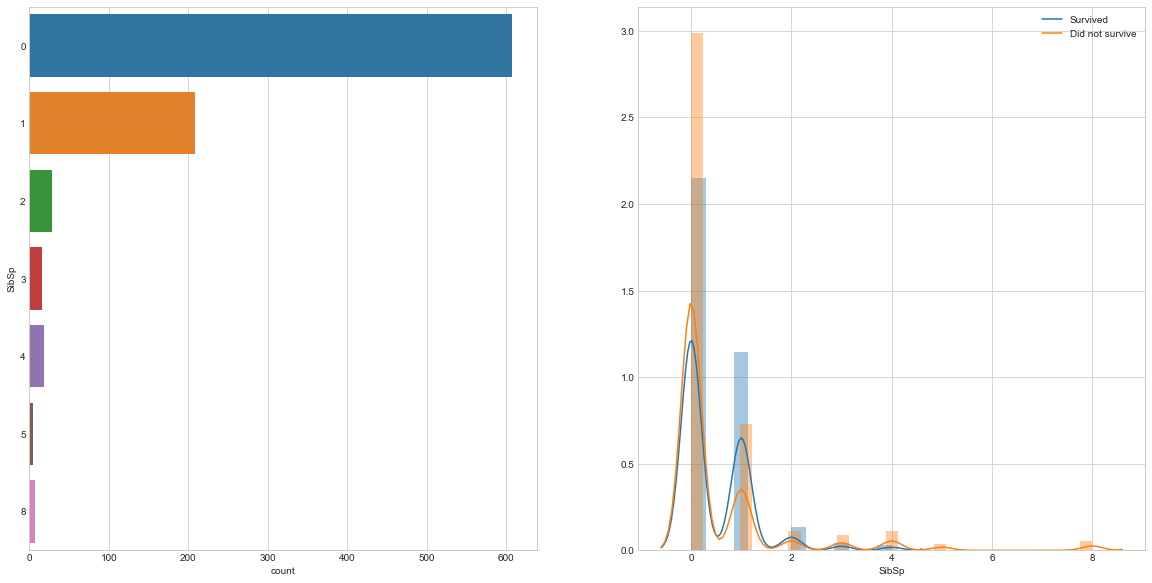

In [32]:
# Visualise the counts of SibSp and the distribution of SibSp against Survival
plot_count_dist(train,label_column='Survived',target_column='SibSp', figsize=(20,10))




## Feature: Parch
Description: The number of parents/children the passenger has aboard the Titanic.

In [33]:
#How many missing values Parch have?
train.Parch.isnull().sum()

0

In [34]:
#What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
#Add parch to new dataframe
df_new['Parch']= train['Parch']

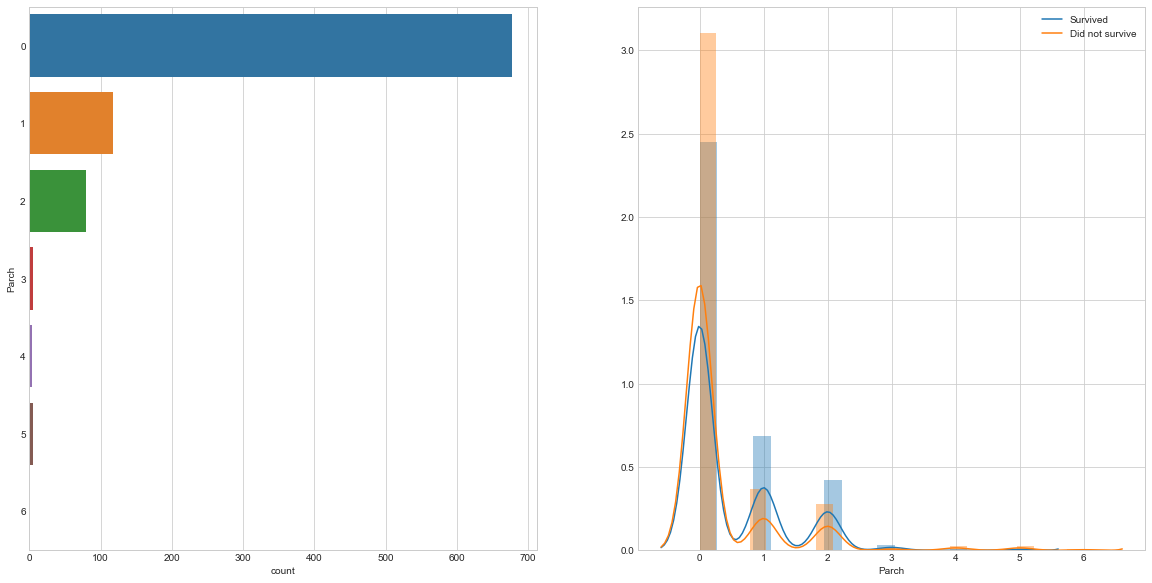

In [36]:
#Visualize the counts of Parch and distribution of values
plot_count_dist(train,label_column='Survived',target_column='Parch',figsize=(20,10))

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [38]:
df_new.head()

Survived  Pclass  Sex  SibSp  Parch
0         0       3    1      1      0
1         1       1    0      1      0
2         1       3    0      0      0
3         1       1    0      1      0
4         0       3    1      0      0

## Feature: Ticket
Description: The ticket number of the boarding passenger.

In [39]:
# How many missing values does Tickets have?
train.Ticket.isnull().sum()

0

In [40]:
# How many kinds of ticket values are there?
train.Ticket.value_counts()

1601                 7
347082               7
CA. 2343             7
3101295              6
347088               6
                    ..
384461               1
2641                 1
STON/O 2. 3101275    1
2628                 1
29103                1
Name: Ticket, Length: 681, dtype: int64

Here length of train.Ticket.value_counts() is 681 which is too many unique values for now. Let's not include this feature in new subset data frame.

## Feature: Fare

Description: How much the ticket cost.

In [41]:
# How many missing values does Fare have?
train.Fare.isnull().sum()


0

In [42]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [43]:
# How many kinds of fare values are there?
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

There are 248 different unique values in fare. Since fare is a numerical continious variable let's add this feature to our new subset data frame.

In [44]:
df_new['Fare']= train['Fare']

In [45]:
df_new.head()

Survived  Pclass  Sex  SibSp  Parch     Fare
0         0       3    1      1      0   7.2500
1         1       1    0      1      0  71.2833
2         1       3    0      0      0   7.9250
3         1       1    0      1      0  53.1000
4         0       3    1      0      0   8.0500

##  Feature: Cabin
Description: The cabin number where the passenger was staying.

In [46]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

The code above returns 687.looks like there is 1/3 number of missing values in feature Cabin. So till we don't have expert advice we do not fill the missing values, rather do not use it for the model right now. Let's go to the next feature.

##      Feature: Embarked
Description: The port where the passenger boarded the Titanic.
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [47]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()


2

In [48]:

# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

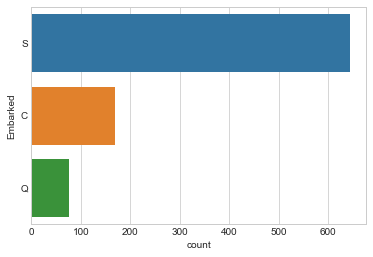

In [49]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

There are multiple ways to deal with missing values. Since only 2 values are missing out of 891 which is very less, let's go with drooping those two rows with a missing value. But first, add this original column to our subset data frame.df_new['Embarked'] = train['Embarked']

In [50]:
# Add Embarked to new dataframes
df_new['Embarked'] = train['Embarked']


In [51]:
# Remove Embarked rows which are missing values
print(len(df_new))
df_new = df_new.dropna(subset=['Embarked'])
print(len(df_new))

891
889


##  Feature Encoding:
Now we have filtered the features which we will use for training our model. But we still have a very important task to do. Feature encoding is the technique applied to features to convert it into numerical form(could be binary form or integer). It is very important to prepare the proper input dataset, compatible with the machine learning algorithm requirements. This will eventually improve the performance of machine learning models.

We can encode the features with one-hot encoding so they will be ready to be used with our machine learning models.

Let's see original 'df_new' dataframe.


In [52]:
df_new.head()

Survived  Pclass  Sex  SibSp  Parch     Fare Embarked
0         0       3    1      1      0   7.2500        S
1         1       1    0      1      0  71.2833        C
2         1       3    0      0      0   7.9250        S
3         1       1    0      1      0  53.1000        S
4         0       3    1      0      0   8.0500        S

In [53]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_new['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_new['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_new['Pclass'], 
                                   prefix='pclass')

In [54]:
# Combine the one hot encoded columns with df_con_enc
df_new_enc = pd.concat([df_new, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_new_enc = df_new_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)




In [55]:
# Let's look at df_con_enc
df_new_enc.head(10)

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  \
0         0      1      0   7.2500           0           0           1      0   
1         1      1      0  71.2833           1           0           0      1   
2         1      0      0   7.9250           0           0           1      1   
3         1      1      0  53.1000           0           0           1      1   
4         0      0      0   8.0500           0           0           1      0   
5         0      0      0   8.4583           0           1           0      0   
6         0      0      0  51.8625           0           0           1      0   
7         0      3      1  21.0750           0           0           1      0   
8         1      0      2  11.1333           0           0           1      1   
9         1      1      0  30.0708           1           0           0      1   

   sex_1  pclass_1  pclass_2  pclass_3  
0      1         0         0         1  
1      0         1         0         0  
2      0         0         0         1  
3      0         1         0         0  
4      1         0         0         1  
5      1         0         0         1  
6      1         1         0         0  
7      1         0         0         1  
8      0         0         0         1  
9      0         0         1         0

##    Start Building Machine Learning Models:

Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

Let's select the data

In [56]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_new_enc

In [57]:
selected_df.head()

Survived  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  \
0         0      1      0   7.2500           0           0           1      0   
1         1      1      0  71.2833           1           0           0      1   
2         1      0      0   7.9250           0           0           1      1   
3         1      1      0  53.1000           0           0           1      1   
4         0      0      0   8.0500           0           0           1      0   

   sex_1  pclass_1  pclass_2  pclass_3  
0      1         0         0         1  
1      0         1         0         0  
2      0         0         0         1  
3      0         1         0         0  
4      1         0         0         1

In [58]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [59]:
# Shape of the data (without labels)
X_train.shape


(889, 11)

In [60]:

X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  sex_1  \
0      1      0   7.2500           0           0           1      0      1   
1      1      0  71.2833           1           0           0      1      0   
2      0      0   7.9250           0           0           1      1      0   
3      1      0  53.1000           0           0           1      1      0   
4      0      0   8.0500           0           0           1      0      1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         0         0         1

In [61]:
# Shape of the labels
y_train.shape

(889,)

##  Define a function to fit machine learning algorithms:
    
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs. To prevent writing code multiple times, we will function fitting the model and returning the accuracy scores.

In [62]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In the function above notice, we are obtaining both training accuracy and cross-validation accuracy as 'acc' and 'acc_cv'. Cross-validation is a powerful preventative measure against overfitting. So we will consider cross-validation error while finalizing the algorithm for survival prediction.

###  Logistic Regression

In [63]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:19.180605


###   K-Nearest Neighbours

In [64]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:01.117627


### Gaussian Naive Bayes

In [65]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.461620


### Linear Support Vector Machines (SVC)

In [66]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.75
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:01.480835


### Stochastic Gradient Descent

In [67]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 67.83
Running Time: 0:00:00.660151



### Decision Tree Classifier

In [68]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(tree.DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running Time: 0:00:00.362849


### Gradient Boost Trees

In [69]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:01.888418


## CatBoost Algorithm:

CatBoost is a state-of-the-art open-source gradient boosting on decision trees library. It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the CatBoost docs .

In [70]:

# View the data for the CatBoost model
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  sex_1  \
0      1      0   7.2500           0           0           1      0      1   
1      1      0  71.2833           1           0           0      1      0   
2      0      0   7.9250           0           0           1      1      0   
3      1      0  53.1000           0           0           1      1      0   
4      0      0   8.0500           0           0           1      0      1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         0         0         1

In [71]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [72]:

# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except Fare can be treated as categorical.

In [73]:

# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)


Earlier we imported CatBoostClassifier, Pool, cv from catboost. Here Pool() function will pool together the training data and categorical feature labels. Now let's fit CatBoostClassifier() algorithm in train_pool and plot the training graph as well.

In [74]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 1.2s	remaining: 19m 57s
1:	learn: 0.6809444	total: 1.21s	remaining: 10m 4s
2:	learn: 0.6751692	total: 1.25s	remaining: 6m 53s
3:	learn: 0.6689060	total: 1.28s	remaining: 5m 17s
4:	learn: 0.6632144	total: 1.3s	remaining: 4m 18s
5:	learn: 0.6576488	total: 1.31s	remaining: 3m 37s
6:	learn: 0.6544441	total: 1.32s	remaining: 3m 7s
7:	learn: 0.6490635	total: 1.34s	remaining: 2m 46s
8:	learn: 0.6443241	total: 1.37s	remaining: 2m 30s
9:	learn: 0.6395935	total: 1.4s	remaining: 2m 18s
10:	learn: 0.6345186	total: 1.43s	remaining: 2m 8s
11:	learn: 0.6305316	total: 1.44s	remaining: 1m 58s
12:	learn: 0.6275610	total: 1.45s	remaining: 1m 49s
13:	learn: 0.6225020	total: 1.47s	remaining: 1m 43s


14:	learn: 0.6179503	total: 1.51s	remaining: 1m 39s
15:	learn: 0.6140480	total: 1.52s	remaining: 1m 33s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

16:	learn: 0.6100034	total: 1.56s	remaining: 1m 30s
17:	learn: 0.6049646	total: 1.58s	remaining: 1m 26s
18:	learn: 0.6025760	total: 1.59s	remaining: 1m 21s
19:	learn: 0.5998630	total: 1.62s	remaining: 1m 19s
20:	learn: 0.5958217	total: 1.64s	remaining: 1m 16s
21:	learn: 0.5914106	total: 1.68s	remaining: 1m 14s
22:	learn: 0.5876739	total: 1.68s	remaining: 1m 11s
23:	learn: 0.5844864	total: 1.7s	remaining: 1m 9s
24:	learn: 0.5807646	total: 1.72s	remaining: 1m 6s
25:	learn: 0.5771272	total: 1.74s	remaining: 1m 5s
26:	learn: 0.5728543	total: 1.77s	remaining: 1m 3s
27:	learn: 0.5698997	total: 1.77s	remaining: 1m 1s
28:	learn: 0.5662608	total: 1.8s	remaining: 1m
29:	learn: 0.5634201	total: 1.83s	remaining: 59.1s
30:	learn: 0.5606398	total: 1.84s	remaining: 57.6s
31:	learn: 0.5589071	total: 1.85s	remaining: 55.9s
32:	learn: 0.5555976	total: 1.86s	remaining: 54.6s
33:	learn: 0.5527465	total: 1.87s	remaining: 53.2s
34:	learn: 0.5502509	total: 1.88s	remaining: 51.8s
35:	learn: 0.5474225	total: 1

180:	learn: 0.4185960	total: 4.62s	remaining: 20.9s
181:	learn: 0.4184559	total: 4.63s	remaining: 20.8s
182:	learn: 0.4180542	total: 4.64s	remaining: 20.7s
183:	learn: 0.4178579	total: 4.65s	remaining: 20.6s
184:	learn: 0.4175684	total: 4.66s	remaining: 20.5s
185:	learn: 0.4173356	total: 4.68s	remaining: 20.5s
186:	learn: 0.4169641	total: 4.7s	remaining: 20.4s
187:	learn: 0.4165340	total: 4.72s	remaining: 20.4s
188:	learn: 0.4162489	total: 4.73s	remaining: 20.3s
189:	learn: 0.4160227	total: 4.75s	remaining: 20.3s
190:	learn: 0.4156773	total: 4.78s	remaining: 20.2s
191:	learn: 0.4153906	total: 4.79s	remaining: 20.2s
192:	learn: 0.4151181	total: 4.8s	remaining: 20.1s
193:	learn: 0.4149058	total: 4.83s	remaining: 20.1s
194:	learn: 0.4147785	total: 4.85s	remaining: 20s
195:	learn: 0.4145078	total: 4.88s	remaining: 20s
196:	learn: 0.4142290	total: 4.92s	remaining: 20s
197:	learn: 0.4138731	total: 4.95s	remaining: 20s
198:	learn: 0.4136525	total: 4.96s	remaining: 20s
199:	learn: 0.4134203	to

341:	learn: 0.3910413	total: 7.4s	remaining: 14.2s
342:	learn: 0.3910351	total: 7.4s	remaining: 14.2s
343:	learn: 0.3908388	total: 7.41s	remaining: 14.1s
344:	learn: 0.3907468	total: 7.42s	remaining: 14.1s
345:	learn: 0.3905556	total: 7.44s	remaining: 14.1s
346:	learn: 0.3905329	total: 7.45s	remaining: 14s
347:	learn: 0.3904624	total: 7.46s	remaining: 14s
348:	learn: 0.3904620	total: 7.46s	remaining: 13.9s
349:	learn: 0.3901004	total: 7.49s	remaining: 13.9s
350:	learn: 0.3900990	total: 7.49s	remaining: 13.9s
351:	learn: 0.3898423	total: 7.52s	remaining: 13.8s
352:	learn: 0.3898011	total: 7.54s	remaining: 13.8s
353:	learn: 0.3897611	total: 7.55s	remaining: 13.8s
354:	learn: 0.3897227	total: 7.56s	remaining: 13.7s
355:	learn: 0.3896826	total: 7.58s	remaining: 13.7s
356:	learn: 0.3895869	total: 7.59s	remaining: 13.7s
357:	learn: 0.3895222	total: 7.59s	remaining: 13.6s
358:	learn: 0.3894892	total: 7.62s	remaining: 13.6s
359:	learn: 0.3893515	total: 7.63s	remaining: 13.6s
360:	learn: 0.3893

510:	learn: 0.3759970	total: 9.8s	remaining: 9.38s
511:	learn: 0.3759798	total: 9.81s	remaining: 9.35s
512:	learn: 0.3759568	total: 9.82s	remaining: 9.32s
513:	learn: 0.3758344	total: 9.84s	remaining: 9.31s
514:	learn: 0.3757406	total: 9.87s	remaining: 9.29s
515:	learn: 0.3757113	total: 9.88s	remaining: 9.27s
516:	learn: 0.3755908	total: 9.89s	remaining: 9.24s
517:	learn: 0.3755538	total: 9.9s	remaining: 9.21s
518:	learn: 0.3753678	total: 9.91s	remaining: 9.19s
519:	learn: 0.3753303	total: 9.93s	remaining: 9.16s
520:	learn: 0.3752635	total: 9.94s	remaining: 9.13s
521:	learn: 0.3751578	total: 9.95s	remaining: 9.11s
522:	learn: 0.3751363	total: 9.96s	remaining: 9.08s
523:	learn: 0.3750279	total: 9.98s	remaining: 9.06s
524:	learn: 0.3748698	total: 9.99s	remaining: 9.04s
525:	learn: 0.3747732	total: 10s	remaining: 9.02s
526:	learn: 0.3747318	total: 10s	remaining: 8.99s
527:	learn: 0.3746743	total: 10s	remaining: 8.96s
528:	learn: 0.3745441	total: 10s	remaining: 8.94s
529:	learn: 0.3745052	

678:	learn: 0.3626910	total: 12.6s	remaining: 5.94s
679:	learn: 0.3624607	total: 12.6s	remaining: 5.93s
680:	learn: 0.3623905	total: 12.6s	remaining: 5.92s
681:	learn: 0.3623699	total: 12.6s	remaining: 5.9s
682:	learn: 0.3622673	total: 12.7s	remaining: 5.88s
683:	learn: 0.3622159	total: 12.7s	remaining: 5.85s
684:	learn: 0.3620935	total: 12.7s	remaining: 5.83s
685:	learn: 0.3620513	total: 12.7s	remaining: 5.81s
686:	learn: 0.3620486	total: 12.7s	remaining: 5.79s
687:	learn: 0.3619951	total: 12.7s	remaining: 5.76s
688:	learn: 0.3619865	total: 12.7s	remaining: 5.74s
689:	learn: 0.3618570	total: 12.7s	remaining: 5.72s
690:	learn: 0.3617204	total: 12.8s	remaining: 5.72s
691:	learn: 0.3617203	total: 12.8s	remaining: 5.71s
692:	learn: 0.3617203	total: 12.8s	remaining: 5.68s
693:	learn: 0.3616484	total: 12.8s	remaining: 5.66s
694:	learn: 0.3616260	total: 12.8s	remaining: 5.64s
695:	learn: 0.3615657	total: 12.9s	remaining: 5.62s
696:	learn: 0.3614506	total: 12.9s	remaining: 5.61s
697:	learn: 0

844:	learn: 0.3516134	total: 15.5s	remaining: 2.85s
845:	learn: 0.3515626	total: 15.6s	remaining: 2.83s
846:	learn: 0.3513883	total: 15.6s	remaining: 2.82s
847:	learn: 0.3512275	total: 15.6s	remaining: 2.8s
848:	learn: 0.3512070	total: 15.6s	remaining: 2.78s
849:	learn: 0.3511331	total: 15.7s	remaining: 2.76s
850:	learn: 0.3511326	total: 15.7s	remaining: 2.74s
851:	learn: 0.3510670	total: 15.7s	remaining: 2.73s
852:	learn: 0.3510078	total: 15.7s	remaining: 2.71s
853:	learn: 0.3509421	total: 15.7s	remaining: 2.69s
854:	learn: 0.3508649	total: 15.8s	remaining: 2.67s
855:	learn: 0.3507884	total: 15.8s	remaining: 2.66s
856:	learn: 0.3506834	total: 15.8s	remaining: 2.64s
857:	learn: 0.3505600	total: 15.9s	remaining: 2.62s
858:	learn: 0.3505130	total: 15.9s	remaining: 2.6s
859:	learn: 0.3504751	total: 15.9s	remaining: 2.59s
860:	learn: 0.3504486	total: 16s	remaining: 2.58s
861:	learn: 0.3503420	total: 16s	remaining: 2.57s
862:	learn: 0.3503026	total: 16.1s	remaining: 2.55s
863:	learn: 0.3501

### Perform CatBoost cross-validation

We performed crossviladation in each model above. So now let's do for CatB

In [75]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)	total: 3.29s	remaining: 54m 52s
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)	total: 6.21s	remaining: 51m 39s
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)	total: 9.1s	remaining: 50m 24s
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)	total: 12.3s	remaining: 51m 2s
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)	total: 19.7s	remaining: 1h 5m 21s
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)	total: 23.8s	remaining: 1h 5m 51s
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)	total: 26.9s	remaining: 1h 3m 31s
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)	total: 34.3s	remaining: 1h 10m 55s
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)	total: 41.7s	remaining: 1h 16m 28s
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)	total: 53.7s	remaining: 1h 28m 38s
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)	total: 1m 6s	remaining: 1h 40m 20s
11:	learn: 0.5

88:	learn: 0.3977839	test: 0.4407548	best: 0.4407548 (88)	total: 7m 27s	remaining: 1h 16m 16s
89:	learn: 0.3973309	test: 0.4406800	best: 0.4406800 (89)	total: 7m 31s	remaining: 1h 16m 3s
90:	learn: 0.3967894	test: 0.4407059	best: 0.4406800 (89)	total: 7m 36s	remaining: 1h 16m 2s
91:	learn: 0.3963210	test: 0.4406911	best: 0.4406800 (89)	total: 7m 41s	remaining: 1h 15m 57s
92:	learn: 0.3959080	test: 0.4406400	best: 0.4406400 (92)	total: 7m 46s	remaining: 1h 15m 47s
93:	learn: 0.3954346	test: 0.4406329	best: 0.4406329 (93)	total: 7m 50s	remaining: 1h 15m 37s
94:	learn: 0.3949190	test: 0.4403517	best: 0.4403517 (94)	total: 7m 55s	remaining: 1h 15m 32s
95:	learn: 0.3944340	test: 0.4402716	best: 0.4402716 (95)	total: 8m 3s	remaining: 1h 15m 55s
96:	learn: 0.3939860	test: 0.4401340	best: 0.4401340 (96)	total: 8m 8s	remaining: 1h 15m 51s
97:	learn: 0.3934840	test: 0.4400352	best: 0.4400352 (97)	total: 8m 15s	remaining: 1h 15m 58s
98:	learn: 0.3930306	test: 0.4398759	best: 0.4398759 (98)	total:

174:	learn: 0.3694642	test: 0.4380150	best: 0.4375885 (133)	total: 16m 10s	remaining: 1h 16m 16s
175:	learn: 0.3691009	test: 0.4380279	best: 0.4375885 (133)	total: 16m 17s	remaining: 1h 16m 18s
176:	learn: 0.3688905	test: 0.4381575	best: 0.4375885 (133)	total: 16m 24s	remaining: 1h 16m 17s
177:	learn: 0.3686335	test: 0.4382308	best: 0.4375885 (133)	total: 16m 30s	remaining: 1h 16m 12s
178:	learn: 0.3684197	test: 0.4383125	best: 0.4375885 (133)	total: 16m 33s	remaining: 1h 15m 58s
179:	learn: 0.3681903	test: 0.4383017	best: 0.4375885 (133)	total: 16m 38s	remaining: 1h 15m 48s
180:	learn: 0.3679923	test: 0.4383894	best: 0.4375885 (133)	total: 16m 43s	remaining: 1h 15m 42s
181:	learn: 0.3678126	test: 0.4384124	best: 0.4375885 (133)	total: 16m 47s	remaining: 1h 15m 26s
182:	learn: 0.3675369	test: 0.4382845	best: 0.4375885 (133)	total: 16m 50s	remaining: 1h 15m 12s
183:	learn: 0.3672577	test: 0.4384239	best: 0.4375885 (133)	total: 16m 54s	remaining: 1h 14m 59s
184:	learn: 0.3670808	test: 0.

260:	learn: 0.3485245	test: 0.4381079	best: 0.4375885 (133)	total: 22m 42s	remaining: 1h 4m 16s
261:	learn: 0.3483311	test: 0.4382153	best: 0.4375885 (133)	total: 22m 46s	remaining: 1h 4m 10s
262:	learn: 0.3481169	test: 0.4382836	best: 0.4375885 (133)	total: 22m 51s	remaining: 1h 4m 4s
263:	learn: 0.3479288	test: 0.4383849	best: 0.4375885 (133)	total: 22m 55s	remaining: 1h 3m 55s
264:	learn: 0.3477250	test: 0.4385126	best: 0.4375885 (133)	total: 22m 59s	remaining: 1h 3m 45s
265:	learn: 0.3475114	test: 0.4386448	best: 0.4375885 (133)	total: 23m 3s	remaining: 1h 3m 37s
266:	learn: 0.3473040	test: 0.4386385	best: 0.4375885 (133)	total: 23m 7s	remaining: 1h 3m 29s
267:	learn: 0.3470589	test: 0.4386647	best: 0.4375885 (133)	total: 23m 11s	remaining: 1h 3m 21s
268:	learn: 0.3467922	test: 0.4387938	best: 0.4375885 (133)	total: 23m 19s	remaining: 1h 3m 24s
269:	learn: 0.3463460	test: 0.4386331	best: 0.4375885 (133)	total: 23m 23s	remaining: 1h 3m 14s
270:	learn: 0.3461522	test: 0.4385446	best:

348:	learn: 0.3265800	test: 0.4368590	best: 0.4368393 (347)	total: 29m 26s	remaining: 54m 54s
349:	learn: 0.3263532	test: 0.4367292	best: 0.4367292 (349)	total: 29m 29s	remaining: 54m 46s
350:	learn: 0.3260335	test: 0.4367583	best: 0.4367292 (349)	total: 29m 33s	remaining: 54m 38s
351:	learn: 0.3257708	test: 0.4366604	best: 0.4366604 (351)	total: 29m 38s	remaining: 54m 34s
352:	learn: 0.3253966	test: 0.4366938	best: 0.4366604 (351)	total: 29m 44s	remaining: 54m 29s
353:	learn: 0.3250437	test: 0.4368238	best: 0.4366604 (351)	total: 29m 47s	remaining: 54m 22s
354:	learn: 0.3247261	test: 0.4366765	best: 0.4366604 (351)	total: 29m 51s	remaining: 54m 14s
355:	learn: 0.3244062	test: 0.4366467	best: 0.4366467 (355)	total: 29m 55s	remaining: 54m 8s
356:	learn: 0.3240140	test: 0.4365042	best: 0.4365042 (356)	total: 30m 6s	remaining: 54m 13s
357:	learn: 0.3237978	test: 0.4364610	best: 0.4364610 (357)	total: 30m 11s	remaining: 54m 8s
358:	learn: 0.3235661	test: 0.4363365	best: 0.4363365 (358)	tot

436:	learn: 0.3050698	test: 0.4335151	best: 0.4333669 (432)	total: 36m 18s	remaining: 46m 47s
437:	learn: 0.3047879	test: 0.4334492	best: 0.4333669 (432)	total: 36m 22s	remaining: 46m 40s
438:	learn: 0.3046007	test: 0.4333917	best: 0.4333669 (432)	total: 36m 26s	remaining: 46m 34s
439:	learn: 0.3044894	test: 0.4334150	best: 0.4333669 (432)	total: 36m 30s	remaining: 46m 27s
440:	learn: 0.3043265	test: 0.4335227	best: 0.4333669 (432)	total: 36m 36s	remaining: 46m 23s
441:	learn: 0.3041210	test: 0.4334722	best: 0.4333669 (432)	total: 36m 40s	remaining: 46m 18s
442:	learn: 0.3039089	test: 0.4333488	best: 0.4333488 (442)	total: 36m 44s	remaining: 46m 12s
443:	learn: 0.3037218	test: 0.4334071	best: 0.4333488 (442)	total: 36m 50s	remaining: 46m 8s
444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)	total: 36m 57s	remaining: 46m 5s
445:	learn: 0.3032770	test: 0.4333923	best: 0.4333488 (442)	total: 37m 2s	remaining: 46m
446:	learn: 0.3031330	test: 0.4332800	best: 0.4332800 (446)	total: 

524:	learn: 0.2880393	test: 0.4325946	best: 0.4320750 (502)	total: 43m 13s	remaining: 39m 6s
525:	learn: 0.2878791	test: 0.4326951	best: 0.4320750 (502)	total: 43m 21s	remaining: 39m 3s
526:	learn: 0.2876788	test: 0.4327238	best: 0.4320750 (502)	total: 43m 25s	remaining: 38m 58s
527:	learn: 0.2875348	test: 0.4327696	best: 0.4320750 (502)	total: 43m 30s	remaining: 38m 53s
528:	learn: 0.2872599	test: 0.4327186	best: 0.4320750 (502)	total: 43m 34s	remaining: 38m 47s
529:	learn: 0.2870168	test: 0.4328814	best: 0.4320750 (502)	total: 43m 38s	remaining: 38m 42s
530:	learn: 0.2868869	test: 0.4328016	best: 0.4320750 (502)	total: 43m 43s	remaining: 38m 37s
531:	learn: 0.2865942	test: 0.4326157	best: 0.4320750 (502)	total: 43m 46s	remaining: 38m 30s
532:	learn: 0.2864453	test: 0.4325459	best: 0.4320750 (502)	total: 43m 50s	remaining: 38m 24s
533:	learn: 0.2862115	test: 0.4324408	best: 0.4320750 (502)	total: 43m 53s	remaining: 38m 18s
534:	learn: 0.2860609	test: 0.4324721	best: 0.4320750 (502)	to

612:	learn: 0.2727616	test: 0.4325734	best: 0.4320750 (502)	total: 50m 11s	remaining: 31m 41s
613:	learn: 0.2726017	test: 0.4325667	best: 0.4320750 (502)	total: 50m 18s	remaining: 31m 37s
614:	learn: 0.2724360	test: 0.4325300	best: 0.4320750 (502)	total: 50m 21s	remaining: 31m 31s
615:	learn: 0.2723018	test: 0.4326013	best: 0.4320750 (502)	total: 50m 25s	remaining: 31m 26s
616:	learn: 0.2721762	test: 0.4325721	best: 0.4320750 (502)	total: 50m 29s	remaining: 31m 20s
617:	learn: 0.2719939	test: 0.4325070	best: 0.4320750 (502)	total: 50m 34s	remaining: 31m 15s
618:	learn: 0.2717858	test: 0.4324518	best: 0.4320750 (502)	total: 50m 39s	remaining: 31m 10s
619:	learn: 0.2716720	test: 0.4324867	best: 0.4320750 (502)	total: 50m 44s	remaining: 31m 6s
620:	learn: 0.2715063	test: 0.4325736	best: 0.4320750 (502)	total: 50m 49s	remaining: 31m 1s
621:	learn: 0.2713287	test: 0.4326050	best: 0.4320750 (502)	total: 50m 53s	remaining: 30m 55s
622:	learn: 0.2711352	test: 0.4325842	best: 0.4320750 (502)	to

700:	learn: 0.2597981	test: 0.4334144	best: 0.4320750 (502)	total: 56m 57s	remaining: 24m 17s
701:	learn: 0.2596849	test: 0.4334274	best: 0.4320750 (502)	total: 57m 2s	remaining: 24m 12s
702:	learn: 0.2595497	test: 0.4334090	best: 0.4320750 (502)	total: 57m 5s	remaining: 24m 7s
703:	learn: 0.2594238	test: 0.4333859	best: 0.4320750 (502)	total: 57m 10s	remaining: 24m 2s
704:	learn: 0.2593448	test: 0.4334076	best: 0.4320750 (502)	total: 57m 15s	remaining: 23m 57s
705:	learn: 0.2592205	test: 0.4334116	best: 0.4320750 (502)	total: 57m 22s	remaining: 23m 53s
706:	learn: 0.2590820	test: 0.4333826	best: 0.4320750 (502)	total: 57m 28s	remaining: 23m 49s
707:	learn: 0.2590055	test: 0.4334517	best: 0.4320750 (502)	total: 57m 32s	remaining: 23m 43s
708:	learn: 0.2588383	test: 0.4333775	best: 0.4320750 (502)	total: 57m 36s	remaining: 23m 38s
709:	learn: 0.2587308	test: 0.4333990	best: 0.4320750 (502)	total: 57m 40s	remaining: 23m 33s
710:	learn: 0.2585979	test: 0.4334153	best: 0.4320750 (502)	tota

787:	learn: 0.2483762	test: 0.4343312	best: 0.4320750 (502)	total: 1h 3m 50s	remaining: 17m 10s
788:	learn: 0.2482692	test: 0.4343696	best: 0.4320750 (502)	total: 1h 3m 54s	remaining: 17m 5s
789:	learn: 0.2480813	test: 0.4342385	best: 0.4320750 (502)	total: 1h 4m	remaining: 17m
790:	learn: 0.2479408	test: 0.4342657	best: 0.4320750 (502)	total: 1h 4m 8s	remaining: 16m 56s
791:	learn: 0.2477937	test: 0.4341648	best: 0.4320750 (502)	total: 1h 4m 15s	remaining: 16m 52s
792:	learn: 0.2476640	test: 0.4342088	best: 0.4320750 (502)	total: 1h 4m 20s	remaining: 16m 47s
793:	learn: 0.2475572	test: 0.4341442	best: 0.4320750 (502)	total: 1h 4m 25s	remaining: 16m 42s
794:	learn: 0.2474062	test: 0.4341902	best: 0.4320750 (502)	total: 1h 4m 29s	remaining: 16m 37s
795:	learn: 0.2473231	test: 0.4342411	best: 0.4320750 (502)	total: 1h 4m 34s	remaining: 16m 32s
796:	learn: 0.2471767	test: 0.4342497	best: 0.4320750 (502)	total: 1h 4m 39s	remaining: 16m 28s
797:	learn: 0.2470054	test: 0.4343555	best: 0.4320

873:	learn: 0.2374644	test: 0.4357637	best: 0.4320750 (502)	total: 1h 10m 31s	remaining: 10m 10s
874:	learn: 0.2373944	test: 0.4357310	best: 0.4320750 (502)	total: 1h 10m 35s	remaining: 10m 5s
875:	learn: 0.2372857	test: 0.4356898	best: 0.4320750 (502)	total: 1h 10m 42s	remaining: 10m
876:	learn: 0.2371945	test: 0.4356562	best: 0.4320750 (502)	total: 1h 10m 47s	remaining: 9m 55s
877:	learn: 0.2370959	test: 0.4357051	best: 0.4320750 (502)	total: 1h 10m 51s	remaining: 9m 50s
878:	learn: 0.2369893	test: 0.4357227	best: 0.4320750 (502)	total: 1h 10m 55s	remaining: 9m 45s
879:	learn: 0.2368576	test: 0.4359343	best: 0.4320750 (502)	total: 1h 10m 59s	remaining: 9m 40s
880:	learn: 0.2367536	test: 0.4359243	best: 0.4320750 (502)	total: 1h 11m 4s	remaining: 9m 36s
881:	learn: 0.2366585	test: 0.4358762	best: 0.4320750 (502)	total: 1h 11m 9s	remaining: 9m 31s
882:	learn: 0.2365361	test: 0.4357817	best: 0.4320750 (502)	total: 1h 11m 13s	remaining: 9m 26s
883:	learn: 0.2364007	test: 0.4358022	best: 

959:	learn: 0.2282274	test: 0.4369488	best: 0.4320750 (502)	total: 1h 17m 11s	remaining: 3m 12s
960:	learn: 0.2281434	test: 0.4369285	best: 0.4320750 (502)	total: 1h 17m 14s	remaining: 3m 8s
961:	learn: 0.2280355	test: 0.4368997	best: 0.4320750 (502)	total: 1h 17m 20s	remaining: 3m 3s
962:	learn: 0.2279637	test: 0.4368655	best: 0.4320750 (502)	total: 1h 17m 25s	remaining: 2m 58s
963:	learn: 0.2278576	test: 0.4368054	best: 0.4320750 (502)	total: 1h 17m 29s	remaining: 2m 53s
964:	learn: 0.2277688	test: 0.4368781	best: 0.4320750 (502)	total: 1h 17m 33s	remaining: 2m 48s
965:	learn: 0.2276667	test: 0.4367777	best: 0.4320750 (502)	total: 1h 17m 36s	remaining: 2m 43s
966:	learn: 0.2275555	test: 0.4368342	best: 0.4320750 (502)	total: 1h 17m 41s	remaining: 2m 39s
967:	learn: 0.2274429	test: 0.4368897	best: 0.4320750 (502)	total: 1h 17m 46s	remaining: 2m 34s
968:	learn: 0.2273245	test: 0.4370361	best: 0.4320750 (502)	total: 1h 17m 50s	remaining: 2m 29s
969:	learn: 0.2272243	test: 0.4370849	best

In [76]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 1:20:25.058483


# Catboost without one-hot-code


In [77]:
# Create a list of columns to be used for the predictions
without_one_hot_columns =df_new.columns
without_one_hot_columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [78]:
# Split the dataframe columns into data and labels
X_df_new = df_new.drop('Survived', axis=1) # data
y_df_new = df_new.Survived # labels

In [79]:
X_df_new.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [80]:
# Define the categorical features for the CatBoost model
cat_features_without_one_hot_columns = np.where(X_df_new.dtypes != np.float)[0]
cat_features_without_one_hot_columns

array([0, 1, 2, 3, 5], dtype=int64)

In [81]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool_without_one_hot_columns = Pool(X_df_new, 
                  y_df_new,
                  cat_features_without_one_hot_columns)

In [89]:
# CatBoost model definition
catboost_model_without_one_hot_columns = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model_without_one_hot_columns.fit(train_pool_without_one_hot_columns,
                   plot=True)

# CatBoost accuracy
acc_catboost_without_one_hot_columns = round(catboost_model_without_one_hot_columns.score(X_df_new, y_df_new) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6876819	total: 30.6ms	remaining: 30.5s
1:	learn: 0.6826774	total: 69.6ms	remaining: 34.8s
2:	learn: 0.6768700	total: 86.7ms	remaining: 28.8s
3:	learn: 0.6714413	total: 110ms	remaining: 27.3s
4:	learn: 0.6660874	total: 135ms	remaining: 26.9s
5:	learn: 0.6615775	total: 143ms	remaining: 23.7s
6:	learn: 0.6569199	total: 160ms	remaining: 22.6s
7:	learn: 0.6526541	total: 165ms	remaining: 20.5s
8:	learn: 0.6484505	total: 189ms	remaining: 20.8s
9:	learn: 0.6441110	total: 206ms	remaining: 20.4s
10:	learn: 0.6399408	total: 212ms	remaining: 19.1s
11:	learn: 0.6349259	total: 228ms	remaining: 18.8s
12:	learn: 0.6309153	total: 236ms	remaining: 18s
13:	learn: 0.6273280	total: 244ms	remaining: 17.2s
14:	learn: 0.6233278	total: 253ms	remaining: 16.6s
15:	learn: 0.6202297	total: 265ms	remaining: 16.3s
16:	learn: 0.6166053	total: 270ms	remaining: 15.6s
17:	learn: 0.6127540	total: 280ms	remaining: 15.3s
18:	learn: 0.6088464	total: 296ms	remaining: 15.3s
19:	learn:

170:	learn: 0.4238845	total: 2.7s	remaining: 13.1s
171:	learn: 0.4237099	total: 2.71s	remaining: 13s
172:	learn: 0.4230923	total: 2.73s	remaining: 13s
173:	learn: 0.4230365	total: 2.74s	remaining: 13s
174:	learn: 0.4229562	total: 2.77s	remaining: 13.1s
175:	learn: 0.4223317	total: 2.8s	remaining: 13.1s
176:	learn: 0.4220716	total: 2.81s	remaining: 13.1s
177:	learn: 0.4218183	total: 2.85s	remaining: 13.1s
178:	learn: 0.4215710	total: 2.86s	remaining: 13.1s
179:	learn: 0.4211126	total: 2.87s	remaining: 13.1s
180:	learn: 0.4208887	total: 2.88s	remaining: 13.1s
181:	learn: 0.4208492	total: 2.89s	remaining: 13s
182:	learn: 0.4205774	total: 2.9s	remaining: 13s
183:	learn: 0.4203306	total: 2.91s	remaining: 12.9s
184:	learn: 0.4198606	total: 2.92s	remaining: 12.9s
185:	learn: 0.4193934	total: 2.94s	remaining: 12.9s
186:	learn: 0.4193798	total: 2.95s	remaining: 12.8s
187:	learn: 0.4188683	total: 2.96s	remaining: 12.8s
188:	learn: 0.4185625	total: 2.97s	remaining: 12.8s
189:	learn: 0.4183152	tot

335:	learn: 0.3905619	total: 6s	remaining: 11.9s
336:	learn: 0.3901921	total: 6.03s	remaining: 11.9s
337:	learn: 0.3900547	total: 6.05s	remaining: 11.9s
338:	learn: 0.3899161	total: 6.07s	remaining: 11.8s
339:	learn: 0.3897729	total: 6.09s	remaining: 11.8s
340:	learn: 0.3896350	total: 6.11s	remaining: 11.8s
341:	learn: 0.3894633	total: 6.13s	remaining: 11.8s
342:	learn: 0.3894013	total: 6.14s	remaining: 11.8s
343:	learn: 0.3891446	total: 6.19s	remaining: 11.8s
344:	learn: 0.3890211	total: 6.22s	remaining: 11.8s
345:	learn: 0.3889247	total: 6.25s	remaining: 11.8s
346:	learn: 0.3888256	total: 6.26s	remaining: 11.8s
347:	learn: 0.3887385	total: 6.3s	remaining: 11.8s
348:	learn: 0.3886283	total: 6.33s	remaining: 11.8s
349:	learn: 0.3885121	total: 6.35s	remaining: 11.8s
350:	learn: 0.3883933	total: 6.36s	remaining: 11.8s
351:	learn: 0.3882720	total: 6.38s	remaining: 11.7s
352:	learn: 0.3881120	total: 6.4s	remaining: 11.7s
353:	learn: 0.3879631	total: 6.41s	remaining: 11.7s
354:	learn: 0.387

499:	learn: 0.3709551	total: 8.79s	remaining: 8.79s
500:	learn: 0.3708365	total: 8.81s	remaining: 8.77s
501:	learn: 0.3707359	total: 8.84s	remaining: 8.77s
502:	learn: 0.3707178	total: 8.86s	remaining: 8.75s
503:	learn: 0.3706335	total: 8.87s	remaining: 8.72s
504:	learn: 0.3705285	total: 8.88s	remaining: 8.71s
505:	learn: 0.3702838	total: 8.89s	remaining: 8.68s
506:	learn: 0.3701749	total: 8.9s	remaining: 8.66s
507:	learn: 0.3700595	total: 8.91s	remaining: 8.63s
508:	learn: 0.3700111	total: 8.92s	remaining: 8.61s
509:	learn: 0.3699453	total: 8.93s	remaining: 8.58s
510:	learn: 0.3698463	total: 8.94s	remaining: 8.56s
511:	learn: 0.3697781	total: 8.96s	remaining: 8.54s
512:	learn: 0.3697548	total: 8.97s	remaining: 8.52s
513:	learn: 0.3696291	total: 9s	remaining: 8.51s
514:	learn: 0.3695436	total: 9.07s	remaining: 8.54s
515:	learn: 0.3694647	total: 9.08s	remaining: 8.52s
516:	learn: 0.3694563	total: 9.09s	remaining: 8.49s
517:	learn: 0.3693519	total: 9.11s	remaining: 8.47s
518:	learn: 0.36

663:	learn: 0.3559448	total: 11.6s	remaining: 5.86s
664:	learn: 0.3557891	total: 11.6s	remaining: 5.84s
665:	learn: 0.3557300	total: 11.6s	remaining: 5.83s
666:	learn: 0.3556401	total: 11.6s	remaining: 5.8s
667:	learn: 0.3555261	total: 11.6s	remaining: 5.79s
668:	learn: 0.3554640	total: 11.7s	remaining: 5.77s
669:	learn: 0.3554078	total: 11.7s	remaining: 5.75s
670:	learn: 0.3552558	total: 11.7s	remaining: 5.73s
671:	learn: 0.3552211	total: 11.7s	remaining: 5.71s
672:	learn: 0.3551421	total: 11.7s	remaining: 5.69s
673:	learn: 0.3550976	total: 11.7s	remaining: 5.67s
674:	learn: 0.3549535	total: 11.8s	remaining: 5.66s
675:	learn: 0.3548364	total: 11.8s	remaining: 5.65s
676:	learn: 0.3548192	total: 11.8s	remaining: 5.63s
677:	learn: 0.3547173	total: 11.8s	remaining: 5.61s
678:	learn: 0.3547173	total: 11.8s	remaining: 5.59s
679:	learn: 0.3545671	total: 11.8s	remaining: 5.58s
680:	learn: 0.3545603	total: 11.9s	remaining: 5.55s
681:	learn: 0.3544502	total: 11.9s	remaining: 5.54s
682:	learn: 0

823:	learn: 0.3428977	total: 15.9s	remaining: 3.4s
824:	learn: 0.3428508	total: 16s	remaining: 3.39s
825:	learn: 0.3427855	total: 16s	remaining: 3.37s
826:	learn: 0.3427613	total: 16.1s	remaining: 3.36s
827:	learn: 0.3426866	total: 16.1s	remaining: 3.34s
828:	learn: 0.3426760	total: 16.1s	remaining: 3.32s
829:	learn: 0.3425698	total: 16.1s	remaining: 3.3s
830:	learn: 0.3425351	total: 16.2s	remaining: 3.29s
831:	learn: 0.3424430	total: 16.2s	remaining: 3.27s
832:	learn: 0.3423297	total: 16.2s	remaining: 3.25s
833:	learn: 0.3422196	total: 16.3s	remaining: 3.24s
834:	learn: 0.3422093	total: 16.4s	remaining: 3.23s
835:	learn: 0.3420654	total: 16.4s	remaining: 3.22s
836:	learn: 0.3419853	total: 16.5s	remaining: 3.2s
837:	learn: 0.3419282	total: 16.5s	remaining: 3.19s
838:	learn: 0.3416497	total: 16.6s	remaining: 3.18s
839:	learn: 0.3415222	total: 16.6s	remaining: 3.16s
840:	learn: 0.3413899	total: 16.8s	remaining: 3.17s
841:	learn: 0.3412744	total: 16.8s	remaining: 3.16s
842:	learn: 0.34123

987:	learn: 0.3298632	total: 23.9s	remaining: 290ms
988:	learn: 0.3298247	total: 23.9s	remaining: 266ms
989:	learn: 0.3297686	total: 23.9s	remaining: 242ms
990:	learn: 0.3296500	total: 23.9s	remaining: 217ms
991:	learn: 0.3295019	total: 24s	remaining: 194ms
992:	learn: 0.3293896	total: 24.1s	remaining: 170ms
993:	learn: 0.3292383	total: 24.1s	remaining: 146ms
994:	learn: 0.3290818	total: 24.1s	remaining: 121ms
995:	learn: 0.3290084	total: 24.2s	remaining: 97ms
996:	learn: 0.3289436	total: 24.2s	remaining: 72.7ms
997:	learn: 0.3288793	total: 24.2s	remaining: 48.5ms
998:	learn: 0.3288314	total: 24.2s	remaining: 24.3ms
999:	learn: 0.3288259	total: 24.3s	remaining: 0us


In [90]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params_without_one_hot_columns = catboost_model_without_one_hot_columns.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data_without_one_hot_columns = cv(train_pool_without_one_hot_columns,
             cv_params_without_one_hot_columns,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time_without_one_hot_columns = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost_without_one_hot_columns = round(np.max(cv_data_without_one_hot_columns['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6750251	test: 0.6755194	best: 0.6755194 (0)	total: 3.47s	remaining: 57m 44s
1:	learn: 0.6599151	test: 0.6606701	best: 0.6606701 (1)	total: 7.81s	remaining: 1h 4m 58s
2:	learn: 0.6455692	test: 0.6464182	best: 0.6464182 (2)	total: 11.6s	remaining: 1h 4m 24s
3:	learn: 0.6324727	test: 0.6334892	best: 0.6334892 (3)	total: 14.7s	remaining: 1h 1m 10s
4:	learn: 0.6205280	test: 0.6210477	best: 0.6210477 (4)	total: 18.8s	remaining: 1h 2m 15s
5:	learn: 0.6088011	test: 0.6093720	best: 0.6093720 (5)	total: 23.5s	remaining: 1h 4m 50s
6:	learn: 0.5969576	test: 0.5976868	best: 0.5976868 (6)	total: 27.6s	remaining: 1h 5m 10s
7:	learn: 0.5858350	test: 0.5870912	best: 0.5870912 (7)	total: 32.5s	remaining: 1h 7m 4s
8:	learn: 0.5779457	test: 0.5792905	best: 0.5792905 (8)	total: 38.1s	remaining: 1h 9m 54s
9:	learn: 0.5688018	test: 0.5706104	best: 0.5706104 (9)	total: 41.4s	remaining: 1h 8m 14s
10:	learn: 0.5605436	test: 0.5627290	best: 0.5627290 (10)	total: 44.9s	remaining: 1h 7m 17s
11:	learn: 

89:	learn: 0.3984516	test: 0.4412074	best: 0.4412074 (89)	total: 6m 27s	remaining: 1h 5m 15s
90:	learn: 0.3978561	test: 0.4411582	best: 0.4411582 (90)	total: 6m 31s	remaining: 1h 5m 15s
91:	learn: 0.3972771	test: 0.4410540	best: 0.4410540 (91)	total: 6m 36s	remaining: 1h 5m 11s
92:	learn: 0.3967908	test: 0.4407542	best: 0.4407542 (92)	total: 6m 40s	remaining: 1h 5m 4s
93:	learn: 0.3963465	test: 0.4405960	best: 0.4405960 (93)	total: 6m 44s	remaining: 1h 4m 59s
94:	learn: 0.3958790	test: 0.4404359	best: 0.4404359 (94)	total: 6m 48s	remaining: 1h 4m 54s
95:	learn: 0.3952455	test: 0.4404696	best: 0.4404359 (94)	total: 6m 51s	remaining: 1h 4m 39s
96:	learn: 0.3948634	test: 0.4404716	best: 0.4404359 (94)	total: 6m 57s	remaining: 1h 4m 43s
97:	learn: 0.3944790	test: 0.4403675	best: 0.4403675 (97)	total: 7m	remaining: 1h 4m 32s
98:	learn: 0.3937942	test: 0.4402927	best: 0.4402927 (98)	total: 7m 4s	remaining: 1h 4m 23s
99:	learn: 0.3933139	test: 0.4404153	best: 0.4402927 (98)	total: 7m 9s	remai

176:	learn: 0.3662487	test: 0.4380309	best: 0.4379303 (136)	total: 12m 55s	remaining: 1h 7s
177:	learn: 0.3659980	test: 0.4380822	best: 0.4379303 (136)	total: 12m 58s	remaining: 59m 56s
178:	learn: 0.3657452	test: 0.4380090	best: 0.4379303 (136)	total: 13m 4s	remaining: 59m 56s
179:	learn: 0.3654328	test: 0.4380171	best: 0.4379303 (136)	total: 13m 8s	remaining: 59m 53s
180:	learn: 0.3651873	test: 0.4379803	best: 0.4379303 (136)	total: 13m 12s	remaining: 59m 45s
181:	learn: 0.3649735	test: 0.4379798	best: 0.4379303 (136)	total: 13m 17s	remaining: 59m 42s
182:	learn: 0.3647345	test: 0.4379734	best: 0.4379303 (136)	total: 13m 20s	remaining: 59m 33s
183:	learn: 0.3644344	test: 0.4379366	best: 0.4379303 (136)	total: 13m 24s	remaining: 59m 29s
184:	learn: 0.3641780	test: 0.4379873	best: 0.4379303 (136)	total: 13m 30s	remaining: 59m 29s
185:	learn: 0.3638825	test: 0.4379524	best: 0.4379303 (136)	total: 13m 33s	remaining: 59m 18s
186:	learn: 0.3637710	test: 0.4380402	best: 0.4379303 (136)	tota

264:	learn: 0.3430031	test: 0.4380460	best: 0.4377410 (254)	total: 20m 37s	remaining: 57m 13s
265:	learn: 0.3426794	test: 0.4380238	best: 0.4377410 (254)	total: 20m 45s	remaining: 57m 16s
266:	learn: 0.3424537	test: 0.4379848	best: 0.4377410 (254)	total: 20m 54s	remaining: 57m 23s
267:	learn: 0.3421109	test: 0.4382066	best: 0.4377410 (254)	total: 21m 2s	remaining: 57m 28s
268:	learn: 0.3419335	test: 0.4381691	best: 0.4377410 (254)	total: 21m 10s	remaining: 57m 32s
269:	learn: 0.3417041	test: 0.4382972	best: 0.4377410 (254)	total: 21m 18s	remaining: 57m 37s
270:	learn: 0.3413692	test: 0.4385176	best: 0.4377410 (254)	total: 21m 23s	remaining: 57m 33s
271:	learn: 0.3411367	test: 0.4385219	best: 0.4377410 (254)	total: 21m 28s	remaining: 57m 29s
272:	learn: 0.3408786	test: 0.4383975	best: 0.4377410 (254)	total: 21m 33s	remaining: 57m 23s
273:	learn: 0.3406863	test: 0.4382801	best: 0.4377410 (254)	total: 21m 37s	remaining: 57m 18s
274:	learn: 0.3404241	test: 0.4380466	best: 0.4377410 (254)	t

352:	learn: 0.3199845	test: 0.4368544	best: 0.4367080 (349)	total: 27m 56s	remaining: 51m 12s
353:	learn: 0.3198074	test: 0.4369996	best: 0.4367080 (349)	total: 28m 1s	remaining: 51m 8s
354:	learn: 0.3194938	test: 0.4370138	best: 0.4367080 (349)	total: 28m 5s	remaining: 51m 1s
355:	learn: 0.3192907	test: 0.4370643	best: 0.4367080 (349)	total: 28m 8s	remaining: 50m 54s
356:	learn: 0.3190446	test: 0.4370187	best: 0.4367080 (349)	total: 28m 11s	remaining: 50m 47s
357:	learn: 0.3188117	test: 0.4370336	best: 0.4367080 (349)	total: 28m 15s	remaining: 50m 40s
358:	learn: 0.3185008	test: 0.4368936	best: 0.4367080 (349)	total: 28m 21s	remaining: 50m 37s
359:	learn: 0.3182154	test: 0.4369789	best: 0.4367080 (349)	total: 28m 24s	remaining: 50m 30s
360:	learn: 0.3180039	test: 0.4369547	best: 0.4367080 (349)	total: 28m 28s	remaining: 50m 24s
361:	learn: 0.3177589	test: 0.4369123	best: 0.4367080 (349)	total: 28m 32s	remaining: 50m 17s
362:	learn: 0.3175465	test: 0.4370316	best: 0.4367080 (349)	total

440:	learn: 0.2998859	test: 0.4378196	best: 0.4365715 (386)	total: 35m 11s	remaining: 44m 36s
441:	learn: 0.2996336	test: 0.4377642	best: 0.4365715 (386)	total: 35m 18s	remaining: 44m 33s
442:	learn: 0.2993962	test: 0.4376903	best: 0.4365715 (386)	total: 35m 21s	remaining: 44m 27s
443:	learn: 0.2992334	test: 0.4376805	best: 0.4365715 (386)	total: 35m 26s	remaining: 44m 22s
444:	learn: 0.2990904	test: 0.4377971	best: 0.4365715 (386)	total: 35m 30s	remaining: 44m 16s
445:	learn: 0.2989039	test: 0.4377582	best: 0.4365715 (386)	total: 35m 34s	remaining: 44m 11s
446:	learn: 0.2987115	test: 0.4378054	best: 0.4365715 (386)	total: 35m 37s	remaining: 44m 4s
447:	learn: 0.2984600	test: 0.4377566	best: 0.4365715 (386)	total: 35m 42s	remaining: 44m
448:	learn: 0.2982461	test: 0.4377920	best: 0.4365715 (386)	total: 35m 49s	remaining: 43m 57s
449:	learn: 0.2980274	test: 0.4378613	best: 0.4365715 (386)	total: 35m 52s	remaining: 43m 51s
450:	learn: 0.2978780	test: 0.4378584	best: 0.4365715 (386)	total

528:	learn: 0.2819266	test: 0.4377975	best: 0.4365715 (386)	total: 42m 20s	remaining: 37m 41s
529:	learn: 0.2817543	test: 0.4376883	best: 0.4365715 (386)	total: 42m 26s	remaining: 37m 38s
530:	learn: 0.2816014	test: 0.4376462	best: 0.4365715 (386)	total: 42m 30s	remaining: 37m 33s
531:	learn: 0.2814599	test: 0.4376886	best: 0.4365715 (386)	total: 42m 35s	remaining: 37m 27s
532:	learn: 0.2811907	test: 0.4377053	best: 0.4365715 (386)	total: 42m 39s	remaining: 37m 22s
533:	learn: 0.2808288	test: 0.4376996	best: 0.4365715 (386)	total: 42m 43s	remaining: 37m 16s
534:	learn: 0.2805309	test: 0.4375723	best: 0.4365715 (386)	total: 42m 48s	remaining: 37m 12s
535:	learn: 0.2803197	test: 0.4376404	best: 0.4365715 (386)	total: 42m 55s	remaining: 37m 9s
536:	learn: 0.2801090	test: 0.4376056	best: 0.4365715 (386)	total: 43m 2s	remaining: 37m 6s
537:	learn: 0.2799790	test: 0.4376857	best: 0.4365715 (386)	total: 43m 7s	remaining: 37m 1s
538:	learn: 0.2797980	test: 0.4376691	best: 0.4365715 (386)	total

616:	learn: 0.2652770	test: 0.4370670	best: 0.4365715 (386)	total: 49m 22s	remaining: 30m 38s
617:	learn: 0.2650780	test: 0.4371497	best: 0.4365715 (386)	total: 49m 27s	remaining: 30m 34s
618:	learn: 0.2649280	test: 0.4371215	best: 0.4365715 (386)	total: 49m 31s	remaining: 30m 28s
619:	learn: 0.2647769	test: 0.4371604	best: 0.4365715 (386)	total: 49m 35s	remaining: 30m 23s
620:	learn: 0.2646294	test: 0.4372083	best: 0.4365715 (386)	total: 49m 39s	remaining: 30m 18s
621:	learn: 0.2644585	test: 0.4372815	best: 0.4365715 (386)	total: 49m 43s	remaining: 30m 13s
622:	learn: 0.2643651	test: 0.4374182	best: 0.4365715 (386)	total: 49m 49s	remaining: 30m 9s
623:	learn: 0.2641835	test: 0.4374321	best: 0.4365715 (386)	total: 49m 54s	remaining: 30m 4s
624:	learn: 0.2640249	test: 0.4373939	best: 0.4365715 (386)	total: 49m 57s	remaining: 29m 58s
625:	learn: 0.2638491	test: 0.4373270	best: 0.4365715 (386)	total: 50m	remaining: 29m 52s
626:	learn: 0.2637180	test: 0.4372953	best: 0.4365715 (386)	total:

704:	learn: 0.2511022	test: 0.4375581	best: 0.4365715 (386)	total: 56m 29s	remaining: 23m 38s
705:	learn: 0.2509475	test: 0.4375253	best: 0.4365715 (386)	total: 56m 33s	remaining: 23m 33s
706:	learn: 0.2508275	test: 0.4375982	best: 0.4365715 (386)	total: 56m 39s	remaining: 23m 28s
707:	learn: 0.2507047	test: 0.4375221	best: 0.4365715 (386)	total: 56m 43s	remaining: 23m 23s
708:	learn: 0.2505559	test: 0.4375729	best: 0.4365715 (386)	total: 56m 50s	remaining: 23m 19s
709:	learn: 0.2504014	test: 0.4376179	best: 0.4365715 (386)	total: 56m 55s	remaining: 23m 14s
710:	learn: 0.2502796	test: 0.4375226	best: 0.4365715 (386)	total: 56m 59s	remaining: 23m 9s
711:	learn: 0.2500886	test: 0.4376200	best: 0.4365715 (386)	total: 57m 2s	remaining: 23m 4s
712:	learn: 0.2499251	test: 0.4375784	best: 0.4365715 (386)	total: 57m 7s	remaining: 22m 59s
713:	learn: 0.2498123	test: 0.4375306	best: 0.4365715 (386)	total: 57m 13s	remaining: 22m 55s
714:	learn: 0.2496480	test: 0.4375407	best: 0.4365715 (386)	tota

792:	learn: 0.2383186	test: 0.4391187	best: 0.4365715 (386)	total: 1h 3m 45s	remaining: 16m 38s
793:	learn: 0.2381691	test: 0.4391870	best: 0.4365715 (386)	total: 1h 3m 49s	remaining: 16m 33s
794:	learn: 0.2380035	test: 0.4393449	best: 0.4365715 (386)	total: 1h 3m 53s	remaining: 16m 28s
795:	learn: 0.2378533	test: 0.4394123	best: 0.4365715 (386)	total: 1h 3m 58s	remaining: 16m 23s
796:	learn: 0.2376885	test: 0.4393102	best: 0.4365715 (386)	total: 1h 4m 3s	remaining: 16m 18s
797:	learn: 0.2375593	test: 0.4392712	best: 0.4365715 (386)	total: 1h 4m 7s	remaining: 16m 13s
798:	learn: 0.2373970	test: 0.4393804	best: 0.4365715 (386)	total: 1h 4m 12s	remaining: 16m 9s
799:	learn: 0.2372814	test: 0.4393180	best: 0.4365715 (386)	total: 1h 4m 16s	remaining: 16m 4s
800:	learn: 0.2371442	test: 0.4393415	best: 0.4365715 (386)	total: 1h 4m 20s	remaining: 15m 59s
801:	learn: 0.2369260	test: 0.4393492	best: 0.4365715 (386)	total: 1h 4m 24s	remaining: 15m 54s
802:	learn: 0.2367608	test: 0.4395326	best: 

878:	learn: 0.2263845	test: 0.4416618	best: 0.4365715 (386)	total: 1h 10m 54s	remaining: 9m 45s
879:	learn: 0.2262833	test: 0.4416383	best: 0.4365715 (386)	total: 1h 11m 2s	remaining: 9m 41s
880:	learn: 0.2261631	test: 0.4417514	best: 0.4365715 (386)	total: 1h 11m 8s	remaining: 9m 36s
881:	learn: 0.2260441	test: 0.4417422	best: 0.4365715 (386)	total: 1h 11m 14s	remaining: 9m 31s
882:	learn: 0.2258799	test: 0.4418243	best: 0.4365715 (386)	total: 1h 11m 20s	remaining: 9m 27s
883:	learn: 0.2257611	test: 0.4418634	best: 0.4365715 (386)	total: 1h 11m 28s	remaining: 9m 22s
884:	learn: 0.2256389	test: 0.4418703	best: 0.4365715 (386)	total: 1h 11m 32s	remaining: 9m 17s
885:	learn: 0.2254602	test: 0.4417661	best: 0.4365715 (386)	total: 1h 11m 36s	remaining: 9m 12s
886:	learn: 0.2253477	test: 0.4418252	best: 0.4365715 (386)	total: 1h 11m 41s	remaining: 9m 7s
887:	learn: 0.2252581	test: 0.4418184	best: 0.4365715 (386)	total: 1h 11m 46s	remaining: 9m 3s
888:	learn: 0.2251432	test: 0.4418758	best: 

964:	learn: 0.2157586	test: 0.4440078	best: 0.4365715 (386)	total: 1h 18m 7s	remaining: 2m 50s
965:	learn: 0.2156531	test: 0.4440061	best: 0.4365715 (386)	total: 1h 18m 13s	remaining: 2m 45s
966:	learn: 0.2155787	test: 0.4440444	best: 0.4365715 (386)	total: 1h 18m 17s	remaining: 2m 40s
967:	learn: 0.2155037	test: 0.4440070	best: 0.4365715 (386)	total: 1h 18m 21s	remaining: 2m 35s
968:	learn: 0.2153536	test: 0.4440300	best: 0.4365715 (386)	total: 1h 18m 25s	remaining: 2m 30s
969:	learn: 0.2152217	test: 0.4441578	best: 0.4365715 (386)	total: 1h 18m 29s	remaining: 2m 25s
970:	learn: 0.2150901	test: 0.4440278	best: 0.4365715 (386)	total: 1h 18m 34s	remaining: 2m 20s
971:	learn: 0.2150236	test: 0.4440842	best: 0.4365715 (386)	total: 1h 18m 39s	remaining: 2m 15s
972:	learn: 0.2149194	test: 0.4440843	best: 0.4365715 (386)	total: 1h 18m 45s	remaining: 2m 11s
973:	learn: 0.2148307	test: 0.4440577	best: 0.4365715 (386)	total: 1h 18m 49s	remaining: 2m 6s
974:	learn: 0.2146881	test: 0.4440239	best

In [93]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost_without_one_hot_columns))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost_without_one_hot_columns))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time_without_one_hot_columns)))

---CatBoost Metrics---
Accuracy: 82.56
Accuracy cross-validation 10-Fold: 81.1
Running Time: 1:21:13.002553


## Model Results:

Which model had the best cross-validation accuracy?

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

##  Regular accuracy scores

In [94]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)


---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  92.46
6     Gradient Boosting Trees  86.61
7                    CatBoost  83.91
0                         KNN  83.46
1         Logistic Regression  79.98
4                  Linear SVC  79.75
2                 Naive Bayes  78.52
3  Stochastic Gradient Decent  78.52

In [95]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
7                    CatBoost  81.32
6     Gradient Boosting Trees  80.65
5               Decision Tree  80.31
1         Logistic Regression  79.42
2                 Naive Bayes  77.95
4                  Linear SVC  77.95
0                         KNN  76.72
3  Stochastic Gradient Decent  67.83

We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the .fit() models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.



# Feature Importance:

Why would you want feature importance?
Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

In [96]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

imp         col
4    0.992061  embarked_Q
3    1.213711  embarked_C
5    1.677219  embarked_S
9    2.178083    pclass_2
8    3.243021    pclass_1
0   10.797435       SibSp
10  11.205450    pclass_3
1   13.988886       Parch
2   15.753218        Fare
6   17.695520       sex_0
7   21.255397       sex_1

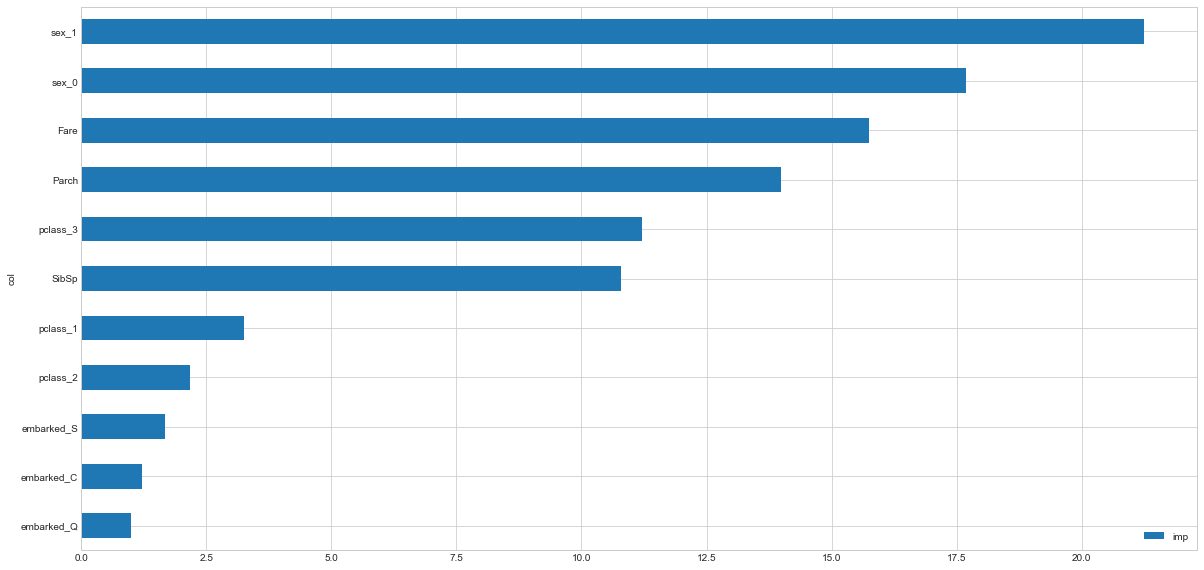

In [97]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Precision and Recall
    
Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

Recall = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

Precision = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an F1 score.

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [98]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


## Submission

Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the test dateframe, encode them and make a prediciton with our model.

In [99]:

# We need our test dataframe to look like this one
X_train.head()

SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  sex_0  sex_1  \
0      1      0   7.2500           0           0           1      0      1   
1      1      0  71.2833           1           0           0      1      0   
2      0      0   7.9250           0           0           1      1      0   
3      1      0  53.1000           0           0           1      1      0   
4      0      0   8.0500           0           0           1      0      1   

   pclass_1  pclass_2  pclass_3  
0         0         0         1  
1         1         0         0  
2         0         0         1  
3         1         0         0  
4         0         0         1

In [118]:

# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [119]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [120]:

# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [121]:
# Let's look at test, it should have one hot encoded columns now
test.head()


PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           1           0           0         1         0         0         1  
1           0           1           1         0         0         0         1  
2           1           0           0         1         0         1         0  
3           0           1           0         1         0         0         1  
4           0           1           1         0         0         0         1

Before making a prediction using the CatBoost model let's check the columns names are either same or not in both test and train set. We did one hot coding in some columns so that will create new  column name.

In [122]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [123]:
X_train.columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_0', 'sex_1', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

you can see the new column names for sex column's dummies are different. let's rename 'test.columns' name.

In [124]:

test.rename(columns={"sex_female": "sex_0", "sex_male": "sex_1"},inplace=True)


In [125]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_0', 'sex_1', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [126]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_0  sex_1  pclass_1  pclass_2  pclass_3  
0           1           0      0      1         0         0         1  
1           0           1      1      0         0         0         1  
2           1           0      0      1         0         1         0  
3           0           1      0      1         0         0         1  
4           0           1      1      0         0         0         1

In [127]:

# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_0', 'sex_1', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [128]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

Here we only used wanted_test_columns in catboost_model.predict().

In [129]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [131]:

# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

In [132]:

# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [133]:
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [134]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [135]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1